**Lab 5** \\
Explainable AI and Shap

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 9.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import xgboost
import shap

# Create pipelines
from sklearn.pipeline import Pipeline 

# Import the preprocessing class
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
X = pd.read_parquet('X.parquet')
y = pd.read_parquet('y.parquet')
base = pd.read_parquet('base_data.parquet')

In [ ]:
my_featuers = X[['matched_carriers_count', 'weight', 'direct_mileage', 'team_driver']]

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


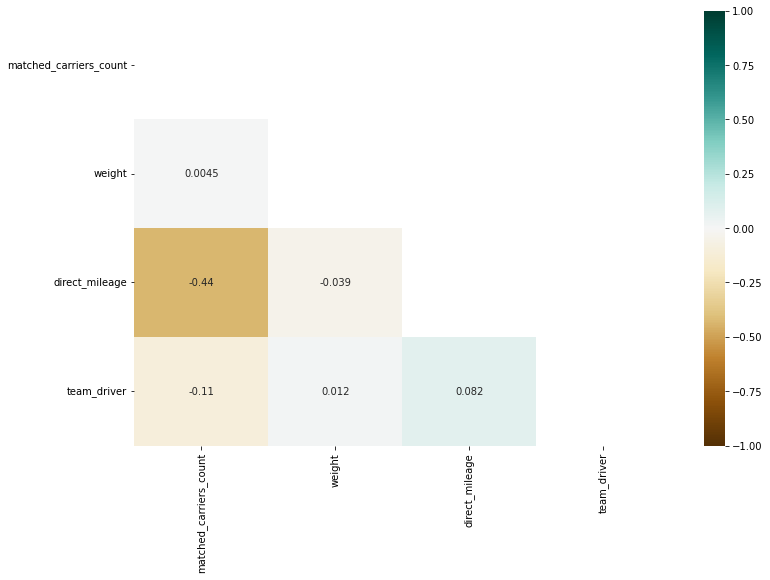

In [ ]:
mask = np.triu(np.ones_like(my_featuers.corr(), dtype=np.bool))
heatmap = sns.heatmap(my_featuers.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
fig = plt.gcf()
fig.set_size_inches(12, 8)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


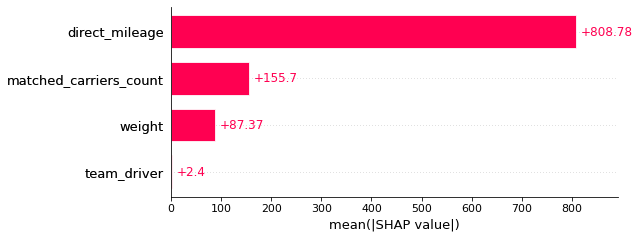

In [ ]:
model = xgboost.XGBRegressor(random_state=0).fit(my_featuers, y)
explainer = shap.Explainer(model)
shap_values = explainer(my_featuers)
shap.plots.bar(shap_values, max_display=20)

If there is a perfect correlation between 2 column names, then you can drop one of them. Be strategic with time as it may taken . You can take smaller sample of data and then take it for shap. 
Team driver does not contribute much to price. 

In [ ]:
model = xgboost.XGBRFRegressor(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(my_featuers[['matched_carriers_count', 'weight', 'direct_mileage','team_driver']], y, random_state=0, shuffle=True)
model.fit(X_train, y_train)
print('R2', model.score(X_test, y_test))
print('MAPE', mean_absolute_percentage_error(model.predict(X_test), y_test))

R2 0.7746348917245071
MAPE 0.24156375125859492


In [ ]:
model = xgboost.XGBRFRegressor(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(my_featuers[['matched_carriers_count', 'weight', 'direct_mileage']], y, random_state=0, shuffle=True)
model.fit(X_train, y_train)
print('R2', model.score(X_test, y_test))
print('MAPE', mean_absolute_percentage_error(model.predict(X_test), y_test))

R2 0.7744743949742138
MAPE 0.2421522178540748


In [ ]:
x_col = list(X.columns)
base_col = list(base.columns)
duplicated_columns = [col for col in base_col if col in x_col]
base.drop(columns=duplicated_columns, inplace=True)
all_data=pd.concat([X, base, y], axis=1)

In [ ]:
#this dataframe will be handy for in-class activity
all_data

,equipment_type,origin_latitude,origin_longitude,dest_latitude,dest_longitude,matched_carriers_count,last_30_days,origin_hq_count,dest_hq_count,origin_kma,...,origin_country,dest_city,dest_state,dest_zipcode,dest_country,pickup_date,quote_date,origin_drop_trailer,dest_drop_trailer,source_price
0,R,41.50,-87.31,34.04,-117.36,903,11.0,139.0,497.0,IN_GRY,...,USA,colton,ca,92324,USA,2019-04-11 07:00:00+00:00,2019-04-05 17:58:32.112000+00:00,False,False,3000.0
1,V,39.10,-84.51,40.75,-84.07,5900,43.0,1899.0,147.0,OH_CIN,...,USA,lima,oh,45804,USA,2020-06-15 12:00:00+00:00,2020-06-12 17:54:26.392000+00:00,False,False,450.0
2,V,40.62,-105.01,38.75,-90.14,2606,1620.0,550.0,128.0,CO_DEN,...,USA,granite city,il,62040,USA,2020-04-24 02:00:00+00:00,2020-04-20 11:12:39.830000+00:00,False,False,821.0
3,V,47.23,-122.24,34.02,-117.55,2774,41.0,138.0,100.0,WA_SEA,...,USA,jurupa valley,ca,91752,USA,2019-05-03 18:00:00+00:00,2019-04-29 11:00:26.697000+00:00,False,False,1300.0
4,V,34.20,-118.50,37.66,-120.88,4327,2321.0,15108.0,1506.0,CA_LAX,...,USA,modesto,ca,95357,USA,2020-01-24 02:00:00+00:00,2020-01-17 18:41:49.245000+00:00,False,False,815.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251384,V,30.54,-91.13,30.17,-94.18,5084,46.0,838.0,510.0,LA_NEW,...,USA,beaumont,tx,77708,USA,2022-08-08 18:00:00+00:00,2022-08-05 15:03:10.250000+00:00,False,False,800.0
251385,F,31.11,-83.42,27.77,-82.39,926,0.0,103.0,44.0,GA_TIF,...,USA,apollo beach,fl,33572,USA,2022-08-18 11:00:00+00:00,2022-08-04 12:22:42.311000+00:00,False,False,1300.0
251386,V,34.05,-117.46,32.96,-96.91,2814,0.0,3181.0,422.0,CA_ONT,...,USA,carrollton,tx,75006,USA,2022-08-12 21:00:00+00:00,2022-08-09 15:00:33.177000+00:00,False,False,3900.0
251387,V,37.73,-121.52,37.91,-121.25,4327,5.0,881.0,2457.0,CA_STK,...,USA,stockton,ca,95206,USA,2022-08-15 18:00:00+00:00,2022-08-10 14:25:04.723000+00:00,False,False,440.0


**In-class activity**  \\
I used only a few features in my dummy example, but you have way more! \\
I want you to do the following. Below there are 4 tasks, which is the minimal to make me happy :)
1. Consider only numeric features that don't require any additional preprocessing and encoding. Run shap.Explainer to estimate the impact of these features. Keep only top 5 discovered features and estimate the accuracy of the model.
2. Add at least one categorical feature (for example, equipment type) using one-hot or ordinal encoding.
3. Add at least one time related feature (for example, weekend)
4. Did your list of top 5 features change? Provide the rationale (a paragraph long or so) to explain why these features may act as cost drivers. 
 
Three more tasks for those who are unstoppable!

1. Can exogenous variables (like macroeconomics of fuel prices) help? 
2. Is there a creative way to incorporate lanes?
3. Using the best features discovered with Shap, build a linear regression model. Is the model still accurate? Are coefficients interpretable and make sense? What do they tell you? 
 
 \\
P.S. \\
Keep in mind that it may take more than 5 minutes to run a cell with XGBoost and Shap explainer. So, you have to be strategic and double-check the validity of syntax before you run the cell. \\

The official Shap documentation is your best friend for this onn-class activity https://github.com/slundberg/shap \\
If you have time, I will recommed an official Shap paper published in 2022 in Nature (it is a bit technical but not too much) https://www.nature.com/articles/s41467-022-31384-3 


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251389 entries, 0 to 251388
Data columns (total 34 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   equipment_type          251389 non-null  category           
 1   origin_latitude         251389 non-null  float64            
 2   origin_longitude        251389 non-null  float64            
 3   dest_latitude           251389 non-null  float64            
 4   dest_longitude          251389 non-null  float64            
 5   matched_carriers_count  251389 non-null  int64              
 6   last_30_days            251389 non-null  float64            
 7   origin_hq_count         251389 non-null  float64            
 8   dest_hq_count           251389 non-null  float64            
 9   origin_kma              251389 non-null  category           
 10  dest_kma                251389 non-null  category           
 11  urbanicity              25

In [ ]:
num_data = all_data.select_dtypes(exclude=['object','category','datetime64[ns, UTC]','bool'])

In [ ]:
num_data = num_data.drop('source_price',axis = 1)

In [ ]:
num_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251389 entries, 0 to 251388
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   origin_latitude         251389 non-null  float64
 1   origin_longitude        251389 non-null  float64
 2   dest_latitude           251389 non-null  float64
 3   dest_longitude          251389 non-null  float64
 4   matched_carriers_count  251389 non-null  int64  
 5   last_30_days            251389 non-null  float64
 6   origin_hq_count         251389 non-null  float64
 7   dest_hq_count           251389 non-null  float64
 8   urbanicity              251389 non-null  float64
 9   hour_of_day             251389 non-null  int64  
 10  effective_hours         251389 non-null  float64
 11  lead_time_hours         251389 non-null  float64
 12  weight                  251389 non-null  int64  
 13  direct_mileage          251389 non-null  float64
 14  drop_trailer        

In [ ]:
num_data = num_data[:100000]
y=y[:100000]
num_data.shape

(100000, 15)

In [ ]:
y.shape

(100000, 1)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


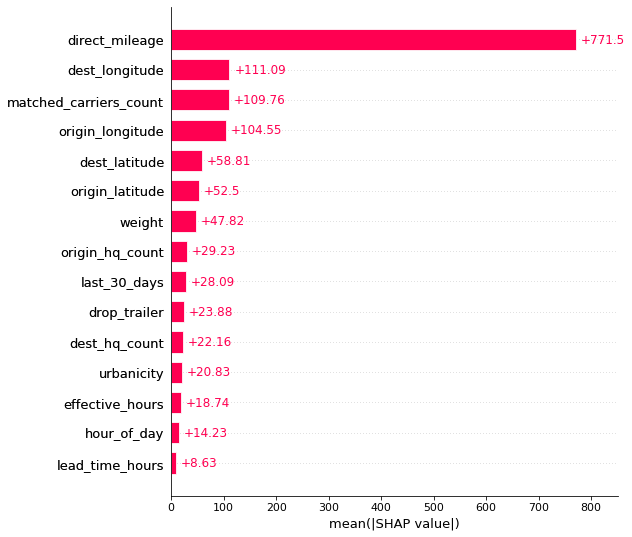

In [ ]:
model = xgboost.XGBRegressor(random_state=0).fit(num_data, y)
explainer = shap.Explainer(model)
shap_values = explainer(num_data)
shap.plots.bar(shap_values, max_display=20)

In [ ]:
model = xgboost.XGBRFRegressor(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(num_data[['direct_mileage','matched_carriers_count', 'weight', 'origin_hq_count','last_30_days']], y, random_state=0, shuffle=True)
model.fit(X_train, y_train)
print('R2', model.score(X_test, y_test))
print('MAPE', mean_absolute_percentage_error(model.predict(X_test), y_test))

R2 0.7675168577422038
MAPE 0.24912891041878651


In [ ]:
num_data = all_data.select_dtypes(exclude=['object','datetime64[ns, UTC]','bool'])
num_data = num_data.drop('source_price',axis = 1)
num_data = num_data.drop('origin_kma',axis=1)
num_data = num_data.drop('dest_kma',axis=1)
num_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 251389 entries, 0 to 251388
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   equipment_type          251389 non-null  category
 1   origin_latitude         251389 non-null  float64 
 2   origin_longitude        251389 non-null  float64 
 3   dest_latitude           251389 non-null  float64 
 4   dest_longitude          251389 non-null  float64 
 5   matched_carriers_count  251389 non-null  int64   
 6   last_30_days            251389 non-null  float64 
 7   origin_hq_count         251389 non-null  float64 
 8   dest_hq_count           251389 non-null  float64 
 9   urbanicity              251389 non-null  float64 
 10  hour_of_day             251389 non-null  int64   
 11  effective_hours         251389 non-null  float64 
 12  lead_time_hours         251389 non-null  float64 
 13  weight                  251389 non-null  int64   
 14  dire

In [ ]:
OH_encoder = OneHotEncoder(handle_unknown='error', sparse=False)
categorical_cols = [cname for cname in num_data.select_dtypes('category')]
num_data_cat = pd.DataFrame(OH_encoder.fit_transform(num_data[categorical_cols]))

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


In [ ]:

num_data_cat.columns = [ 'type0','type1','type2']
num_data_cat

,type0,type1,type2
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
251384,0.0,0.0,1.0
251385,1.0,0.0,0.0
251386,0.0,0.0,1.0
251387,0.0,0.0,1.0


In [ ]:
num_data = num_data.drop(categorical_cols, axis=1)
num_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251389 entries, 0 to 251388
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   origin_latitude         251389 non-null  float64
 1   origin_longitude        251389 non-null  float64
 2   dest_latitude           251389 non-null  float64
 3   dest_longitude          251389 non-null  float64
 4   matched_carriers_count  251389 non-null  int64  
 5   last_30_days            251389 non-null  float64
 6   origin_hq_count         251389 non-null  float64
 7   dest_hq_count           251389 non-null  float64
 8   urbanicity              251389 non-null  float64
 9   hour_of_day             251389 non-null  int64  
 10  effective_hours         251389 non-null  float64
 11  lead_time_hours         251389 non-null  float64
 12  weight                  251389 non-null  int64  
 13  direct_mileage          251389 non-null  float64
 14  drop_trailer        

In [ ]:
num_data_cat = pd.concat([num_data,num_data_cat],axis=1)

In [ ]:
num_data_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251389 entries, 0 to 251388
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   origin_latitude         251389 non-null  float64
 1   origin_longitude        251389 non-null  float64
 2   dest_latitude           251389 non-null  float64
 3   dest_longitude          251389 non-null  float64
 4   matched_carriers_count  251389 non-null  int64  
 5   last_30_days            251389 non-null  float64
 6   origin_hq_count         251389 non-null  float64
 7   dest_hq_count           251389 non-null  float64
 8   urbanicity              251389 non-null  float64
 9   hour_of_day             251389 non-null  int64  
 10  effective_hours         251389 non-null  float64
 11  lead_time_hours         251389 non-null  float64
 12  weight                  251389 non-null  int64  
 13  direct_mileage          251389 non-null  float64
 14  drop_trailer        

In [ ]:
num_data_cat = num_data_cat[:100000]
y=y[:100000]
num_data_cat.shape


(100000, 18)

In [ ]:
y.shape

(100000, 1)

In [ ]:
cols = ['direct_mileage','matched_carriers_count', 'weight', 'origin_hq_count','last_30_days','type0','type1','type2']

In [ ]:
final_num_cat = num_data_cat[cols].copy()

In [ ]:
final_num_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   direct_mileage          100000 non-null  float64
 1   matched_carriers_count  100000 non-null  int64  
 2   weight                  100000 non-null  int64  
 3   origin_hq_count         100000 non-null  float64
 4   last_30_days            100000 non-null  float64
 5   type0                   100000 non-null  float64
 6   type1                   100000 non-null  float64
 7   type2                   100000 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 6.9 MB


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


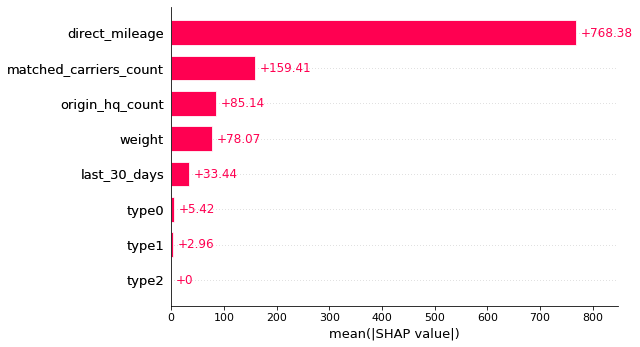

In [ ]:
model = xgboost.XGBRegressor(random_state=0).fit(final_num_cat, y)
explainer = shap.Explainer(model)
shap_values = explainer(final_num_cat)
shap.plots.bar(shap_values, max_display=20)

In [ ]:
time = all_data.select_dtypes(exclude=['int','float','object','category','bool'])
time = time.drop('quote_date',axis=1)
time=time[:100000]
time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 1 columns):
 #   Column       Non-Null Count   Dtype              
---  ------       --------------   -----              
 0   pickup_date  100000 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 1.5 MB


In [ ]:
final_num_cat_time = pd.concat([final_num_cat,time],axis=1)

In [ ]:
final_num_cat_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   direct_mileage          100000 non-null  float64            
 1   matched_carriers_count  100000 non-null  int64              
 2   weight                  100000 non-null  int64              
 3   origin_hq_count         100000 non-null  float64            
 4   last_30_days            100000 non-null  float64            
 5   type0                   100000 non-null  float64            
 6   type1                   100000 non-null  float64            
 7   type2                   100000 non-null  float64            
 8   pickup_date             100000 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 7.6 MB


In [ ]:
final_num_cat_time['weekend'] = final_num_cat_time['pickup_date'].dt.dayofweek > 4

In [ ]:
final_num_cat_time.info()
final_num_cat_time = final_num_cat_time.drop('pickup_date',axis=1)
final_num_cat_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   direct_mileage          100000 non-null  float64            
 1   matched_carriers_count  100000 non-null  int64              
 2   weight                  100000 non-null  int64              
 3   origin_hq_count         100000 non-null  float64            
 4   last_30_days            100000 non-null  float64            
 5   type0                   100000 non-null  float64            
 6   type1                   100000 non-null  float64            
 7   type2                   100000 non-null  float64            
 8   pickup_date             100000 non-null  datetime64[ns, UTC]
 9   weekend                 100000 non-null  bool               
dtypes: bool(1), datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 7.7 MB
<class 'pandas.

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


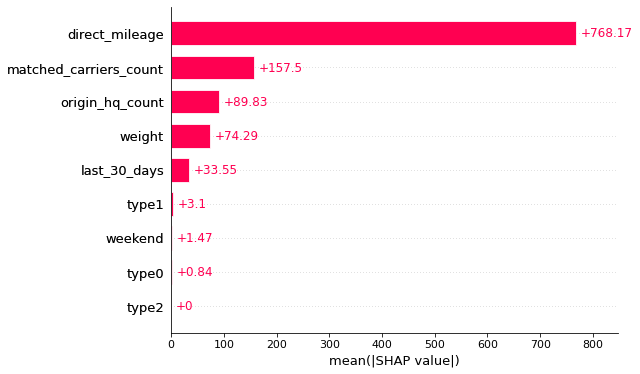

In [ ]:
model = xgboost.XGBRegressor(random_state=0).fit(final_num_cat_time, y)
explainer = shap.Explainer(model)
shap_values = explainer(final_num_cat_time)
shap.plots.bar(shap_values, max_display=20)

I think the variables did not change as the impact from the top 5 int/float was very influential. The equipment type did not influence as much as the 5 int/float. As seen above we can see that there is some influence from the categorical variable and the weekend or not, but there is more influence from the top 5 int/float variables. This makes sense as the price is directly depending on the distance more, then matched carriers, , origin hq_Count ( as more trucks availabel can affect price or vice versa), weight as fuel costs can be more with heavier loads, and last 30 days. 

The exogenous factors defintely will help. We can add general cpi or similar industry performance industries to see how general market performance affects prices. 

I am submitting the base requirement now. I will work on this in weekend on the unstoppable ones today and resubmit by weekend on the additional requirement. Thanks for the awesome class. 